## Churn Prediction

The churn rate, also known as the rate of attrition or customer churn, is the rate at which customers stop doing business with an entity. It is most commonly expressed as the percentage of service subscribers who discontinue their subscriptions within a given time period.

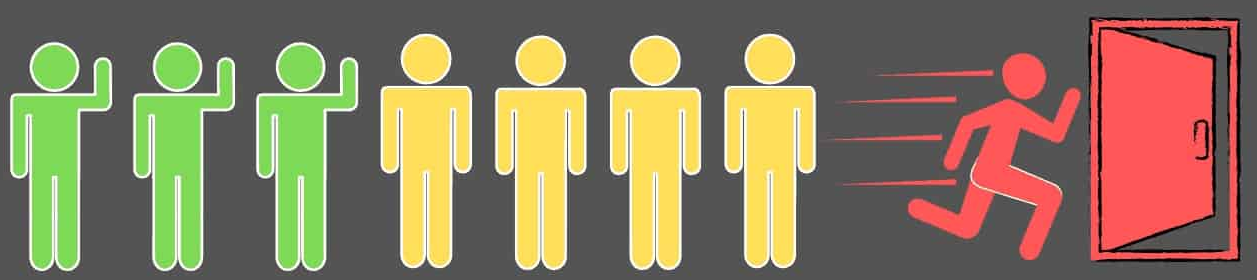


## Python Libraries Used

In [1]:
## Sometime due to library versions, code throwing a lot of warnings which destroy code readibility
## This library is used to avoid warnings, hence increase code readibility
import warnings
warnings.filterwarnings('ignore')

## Libraries for data manipulation
import pandas as pd
import numpy as np

## this is to tackle one of the bug in SKLEARN version when using SAMPLING
import sys
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# library for Machine Learning Models
from sklearn.ensemble import RandomForestClassifier    
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Library for Training and testing data split
from sklearn.model_selection import train_test_split

# libraries for confusion Matrix, Classification Repports, ROC and AUC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score

## library to deal with paths and files
import glob
glob.glob("*")

['Data Science Brief.docx',
 'Evolve DS Assessment.ipynb',
 'Evolve DS Assessment.pdf',
 'listing_churn_data.csv',
 '~$ta Science Brief.docx']

## Load Training Data

In [2]:
listing_churn_data = pd.read_csv("listing_churn_data.csv")
listing_churn_data

,avg_interactions_with_support,owner_blocks_per_month,avg_income_last_12,avg_income_last_6,avg_review_score,number_of_reviews,bookings_per_month,weekends_booked_per_month,avg_nightly_rate,avg_length_of_stay,churn
0,0.617163,9.577551,3814.028288,5426.263674,2.057209,15.310482,6.807388,2.000974,112.447254,2.251096,0
1,0.806455,8.798974,4206.420776,4655.139391,2.688184,12.099859,11.036336,1.745107,162.364418,1.963245,0
2,0.782139,7.734795,4552.123937,3851.009952,2.607130,12.348177,9.001582,1.961279,362.219228,2.206438,0
3,0.718405,8.326465,2678.914523,3593.631638,2.394683,13.332082,6.156692,2.155884,284.710399,2.425369,0
4,0.449931,9.654206,3152.906971,4352.544162,1.499769,17.709455,5.898279,2.715650,219.075644,3.055107,0
...,...,...,...,...,...,...,...,...,...,...,...
124995,0.585459,6.303290,2166.011804,5023.704465,1.951531,15.693421,9.144062,2.216718,235.660367,2.493807,0
124996,0.734973,8.412311,4166.119218,5757.945106,2.449910,13.046598,10.830358,2.138479,202.556812,2.405789,0
124997,0.590093,9.155676,4240.974017,5271.681395,1.966975,15.617442,9.821980,2.207542,207.481739,2.483485,0
124998,0.706591,9.833579,3051.232607,1451.700733,2.355304,13.543059,9.725024,2.160005,306.803958,2.430005,0


## Basic Data Information

In [3]:
listing_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   avg_interactions_with_support  125000 non-null  float64
 1   owner_blocks_per_month         125000 non-null  float64
 2   avg_income_last_12             125000 non-null  float64
 3   avg_income_last_6              125000 non-null  float64
 4   avg_review_score               125000 non-null  float64
 5   number_of_reviews              125000 non-null  float64
 6   bookings_per_month             125000 non-null  float64
 7   weekends_booked_per_month      125000 non-null  float64
 8   avg_nightly_rate               125000 non-null  float64
 9   avg_length_of_stay             125000 non-null  float64
 10  churn                          125000 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 10.5 MB


## Missing Values Analysis

In [4]:
listing_churn_data.isna().sum()

avg_interactions_with_support    0
owner_blocks_per_month           0
avg_income_last_12               0
avg_income_last_6                0
avg_review_score                 0
number_of_reviews                0
bookings_per_month               0
weekends_booked_per_month        0
avg_nightly_rate                 0
avg_length_of_stay               0
churn                            0
dtype: int64

## Data Description

In [5]:
listing_churn_data.describe().T

,count,mean,std,min,25%,50%,75%,max
avg_interactions_with_support,125000.0,0.678076,0.147854,1.665335e-16,0.578700,0.675552,0.774262,1.5
owner_blocks_per_month,125000.0,7.725324,1.687156,0.000000e+00,6.587806,7.730746,8.860805,15.0
avg_income_last_12,125000.0,3963.240052,967.139860,1.776357e-12,3313.675849,3964.778090,4616.418586,8000.0
avg_income_last_6,125000.0,4599.630038,1022.538725,0.000000e+00,3908.434213,4602.625155,5286.370759,9500.0
avg_review_score,125000.0,2.260253,0.492847,5.551115e-16,1.929000,2.251840,2.580873,5.0
number_of_reviews,125000.0,14.106742,2.426508,0.000000e+00,12.547839,14.159391,15.732120,25.0
bookings_per_month,125000.0,7.870451,1.692926,0.000000e+00,6.724655,7.868453,9.011352,15.0
weekends_booked_per_month,125000.0,2.109165,0.342966,0.000000e+00,1.881241,2.110030,2.337891,4.0
avg_nightly_rate,125000.0,242.812677,48.439414,0.000000e+00,210.278615,242.795664,275.736857,450.0
avg_length_of_stay,125000.0,2.372810,0.385836,0.000000e+00,2.116396,2.373784,2.630127,4.5


## Initial Thoughts

**Data Types**: All the features are of contineous types.

**Problem Type**: The problem is of supervised problem (Classification Problem).

**No of Classes**: There are `2` classes.

## Function to Create Labeled Barplots

- Although there is no many categorical variable except target variable, but still I am creating function to display labelled and informative bar plots. This function will be reused again and again to reduce code size and increase code readibility. 

In [6]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

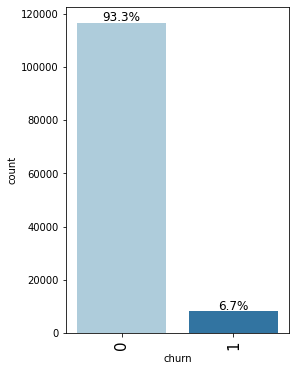

In [7]:
labeled_barplot(listing_churn_data, "churn", perc=True)

#### The problem is class Imbalance problem

Data are said to suffer the Class Imbalance Problem when the class distributions are highly imbalanced. In this context, many classification learning algorithms have low predictive accuracy for the infrequent class. We can solve this problem using:-
- Cost-sensitive learning is a common approach to solve this problem.
- Over Sampling (**I will be using this**)
- Under Sampling

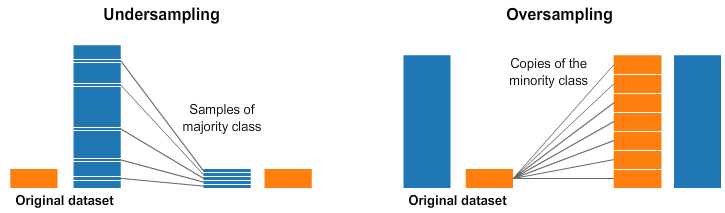

## Exploratory Data Analysis (EDA)

In [8]:
def showHist(columnName):
    
    # Create two plots to show 
    # - One for Class churn=0
    # - Other for Class churn=1
    fig, a =  plt.subplots(1, 2, figsize=(20, 5))
    
    try:
        # if the variable is contineous data, then draw Histogram 
        a[0].hist(listing_churn_data[listing_churn_data["churn"] == 1][columnName])
        a[1].hist(listing_churn_data[listing_churn_data["churn"] == 0][columnName])
    except:
        # if the variable is discrete data, then draw Bar plot (we have no discrete type)
        listing_churn_data[listing_churn_data["churn"] == 1][columnName].value_counts().plot(kind='barh', ax=a[0])
        listing_churn_data[listing_churn_data["churn"] == 0][columnName].value_counts().plot(kind='barh', ax=a[1])
    
    # Set Axis of the chart and other annotations
    a[0].set_title(columnName + ' - Churned')
    a[1].set_title(columnName + ' - Not Churned')
    fig.tight_layout()
    plt.subplots_adjust(left=0.125,
                            bottom=0.1, 
                            right=0.9, 
                            top=0.9, 
                            wspace=0.4, 
                            hspace=0.35)
    plt.show()

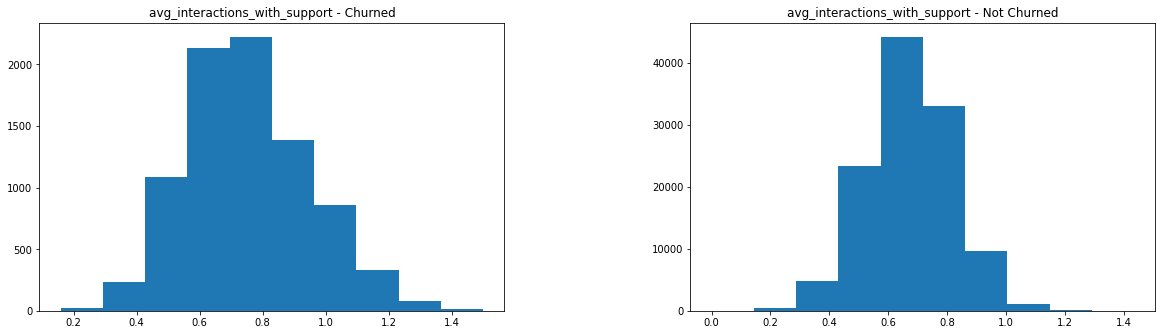

In [9]:
showHist(listing_churn_data.columns[0])

**People who churned have normally larger average interaction with support as compare to people who didn't churned. It means that people when interact with support and they are not entertained, they have high tendency to churn.**

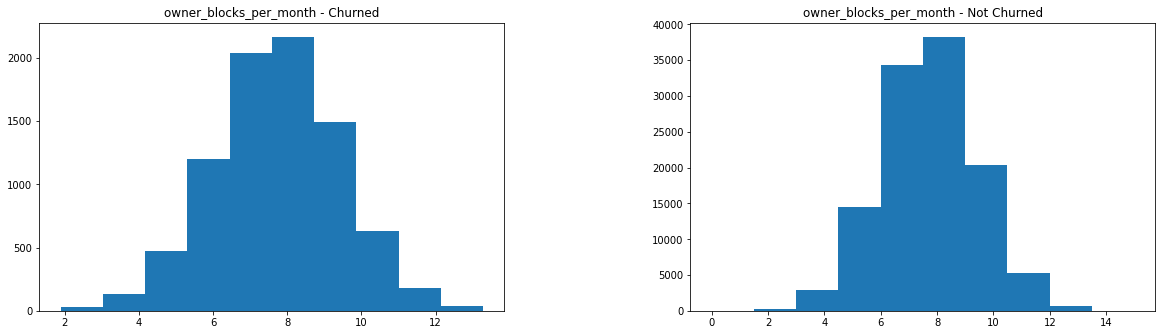

In [10]:
showHist(listing_churn_data.columns[1])

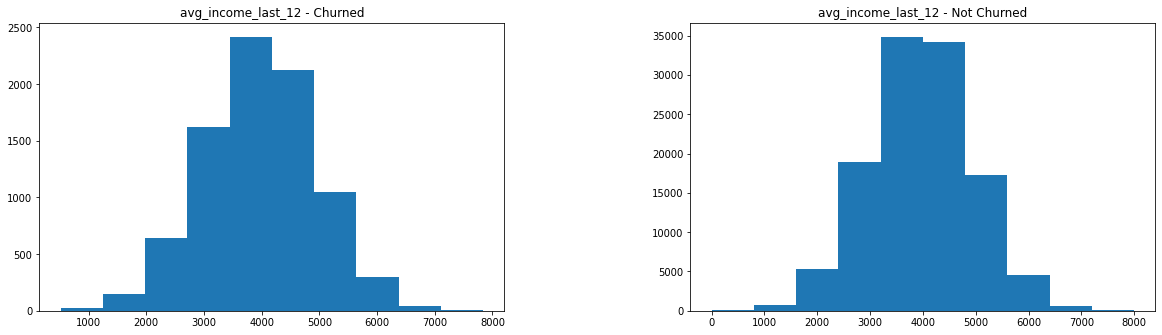

In [11]:
showHist(listing_churn_data.columns[2])

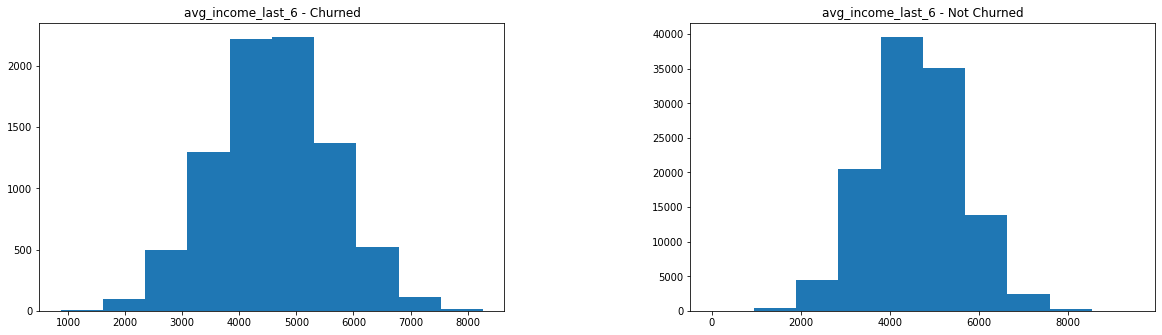

In [12]:
showHist(listing_churn_data.columns[3])

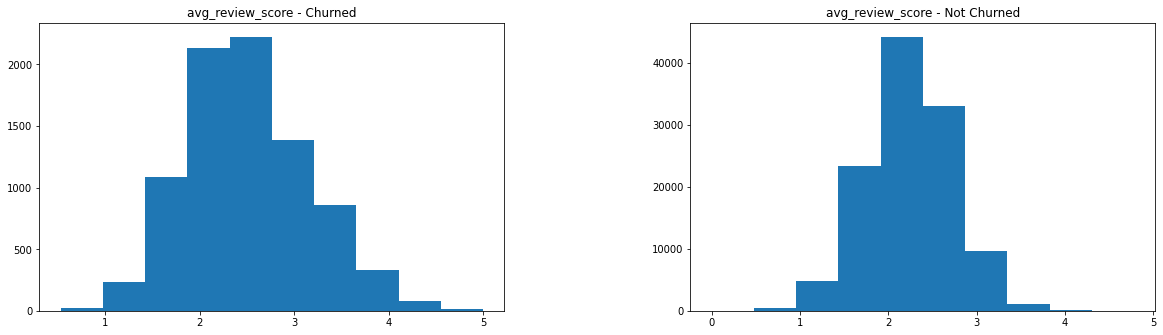

In [13]:
showHist(listing_churn_data.columns[4])

**For employees having average reviews of less than 2.5 or very high, tends to churn.**

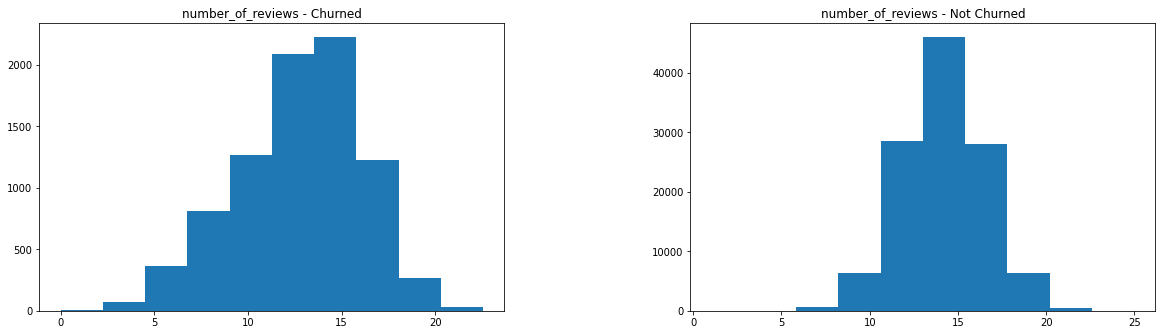

In [14]:
showHist(listing_churn_data.columns[5])

**Employees whose average reviews are more, tends to stay in company, because they are regularly monitored and given feedback.**

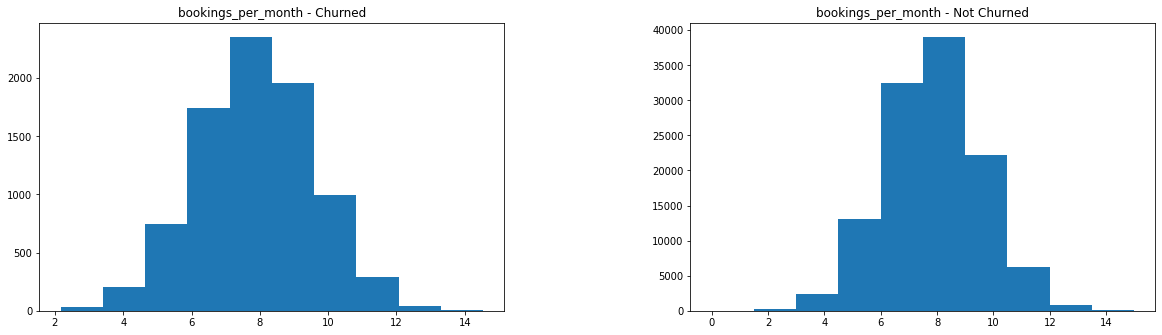

In [15]:
showHist(listing_churn_data.columns[6])

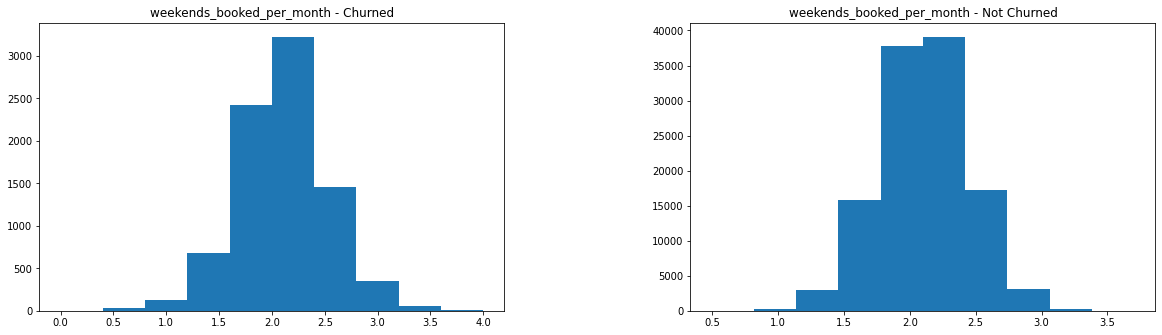

In [16]:
showHist(listing_churn_data.columns[7])

**Employees having Number of weekends booked tends to churn more often as compared to those who are free on weekends.**

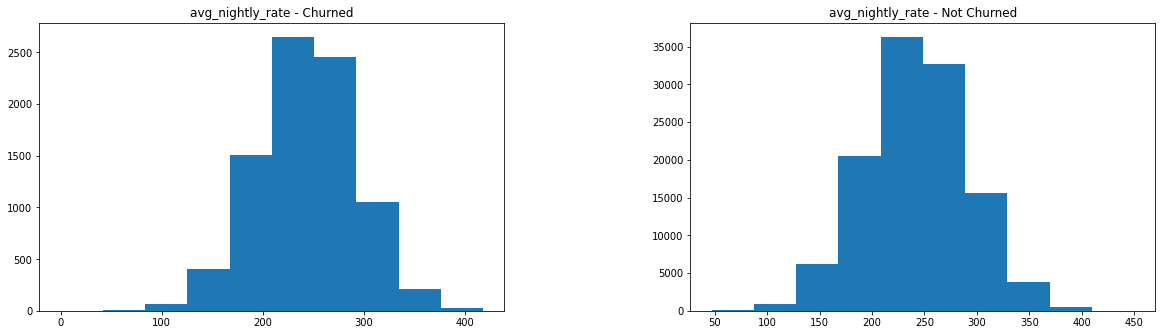

In [17]:
showHist(listing_churn_data.columns[8])

**Employees having average nightly rate less have tendency to churn. The average nightly rate for those who churn is maximum `400`, while for those who didnt churn is `450` at maximum.**

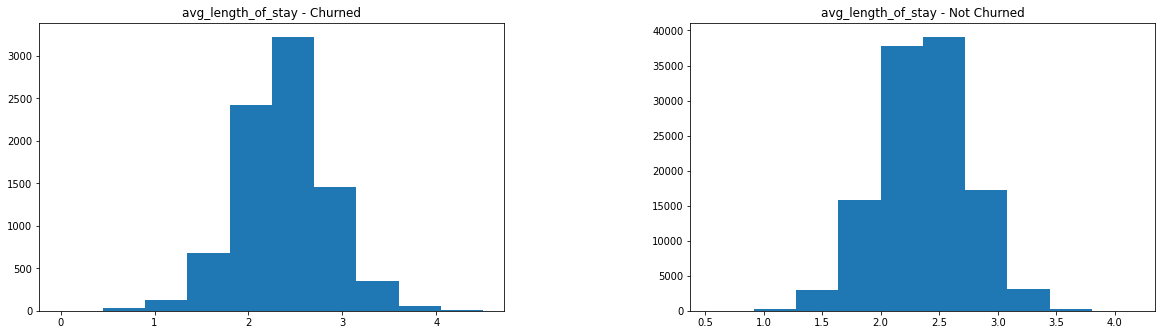

In [18]:
showHist(listing_churn_data.columns[9])

## Feature Correlation - Heatmap

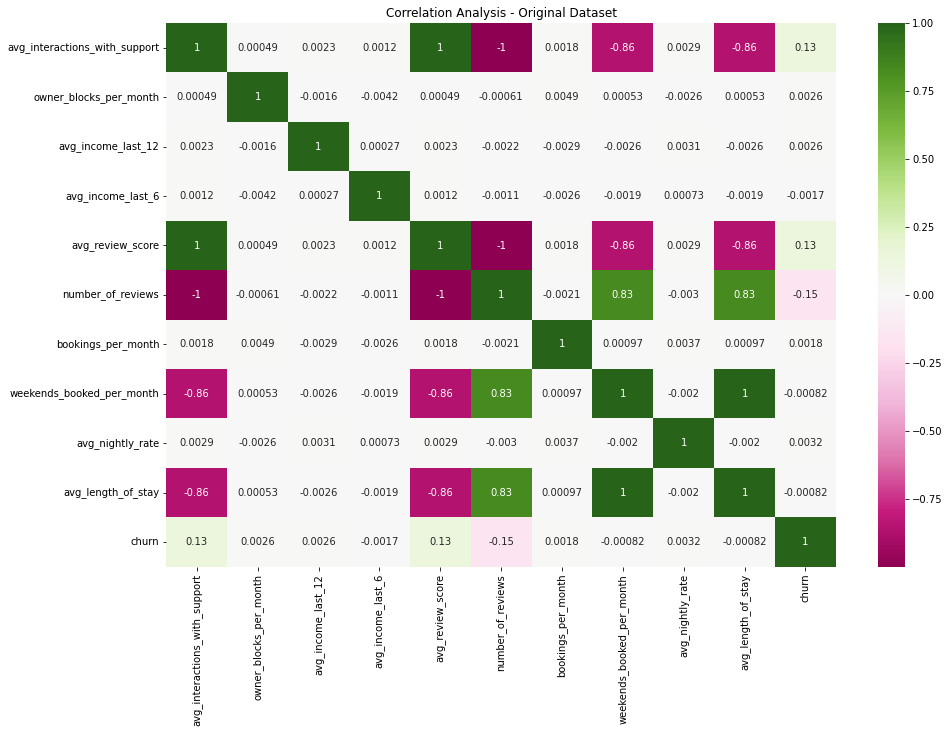

In [19]:
plt.figure(figsize=(15, 10))
sns.heatmap(listing_churn_data.corr(), cmap="PiYG", annot=True)
plt.title("Correlation Analysis - Original Dataset")
plt.show()

In [20]:
listing_churn_data.corr()[['churn']].sort_values(by='churn')

,churn
number_of_reviews,-0.147947
avg_income_last_6,-0.001686
avg_length_of_stay,-0.000822
weekends_booked_per_month,-0.000822
bookings_per_month,0.001804
owner_blocks_per_month,0.002609
avg_income_last_12,0.002630
avg_nightly_rate,0.003209
avg_interactions_with_support,0.133712
avg_review_score,0.133712


**Following features are highly positive correlated to target variable churn**

- avg_review_score
- avg_interactions_with_support
- avg_nightly_rate
- avg_income_last_12

**Means if these variables values increase, the employees have less chances to leave and vice versa.**


**Following features are highly negative correlated to target variable churn**

- number_of_reviews
- avg_income_last_6

**Means if these variables values decrease, the chance of employees to left increase and vice versa.**

## We can Reduce Size of Dataset

- To solve Class Imbalance Problem
- To make training faster

In [28]:
print("Separate Churn and Not Churn")
churn = listing_churn_data[listing_churn_data['churn'] == 1]
not_churn = listing_churn_data[listing_churn_data['churn'] == 0]

Separate Churn and Not Churn


In [29]:
print("Take Random Sample (70% of data) from NOT CHURNED employees")
print("Not Churned before sampling {}".format(not_churn.shape[0]))
not_churn = not_churn.sample(frac=0.7)
print("Not Churned after sampling {}".format(not_churn.shape[0]))

Take Random Sample (70% of data) from NOT CHURNED employees
Not Churned before sampling 116628
Not Churned after sampling 81640


In [30]:
print("Merge data again - CHURNED and NOT CHURNED")
dataset = pd.concat([churn, not_churn])
dataset.shape

Merge data again - CHURNED and NOT CHURNED


(90012, 11)

## Machine Learning Modeling

- This function performs following
    - Train Test Split (70% data for training and 30% data for testing)
    - Do Over Sampling using SMOTE - because problem is class imbalance i.e the number of companiues churned are very very less than companies not churned

In [34]:
dataset["churn"].value_counts()

0    81640
1     8372
Name: churn, dtype: int64

## Lets Create Training and Testing Data

In [35]:
X = dataset.drop(columns=['churn'])
Y = dataset['churn']

## Split Training and Testing Data

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, stratify=Y, random_state=100)

## Machine Learning Algos Function

- Uses 
    - Random Forest Algorithm
    - KNN
    - Linear Regression

If future you can just add algorithm to this and call function, no need to write complete code.

Then will select best on performance. That best will be deployed.

In [37]:
def trainMachineLearningALgorithm(X_train, X_test, y_train, y_test, algo="RF", over_sampling=False):    

    print("Machine Learning Training Started")
    # make Random Forest Classifier object
    if algo == "RF":
        forest = RandomForestClassifier(n_estimators=500, random_state=1, n_jobs=3)
    elif algo == "KNN":
        forest = KNeighborsClassifier(n_neighbors=5)
    elif algo == "LR":
        forest = LogisticRegression()
    elif algo == "SVC":
        from sklearn.svm import SVC
        forest = SVC()
    
    
    if over_sampling is True:
        print("Doing Over Sampling")
        print("Data Size before Over Sampling is {}".format(X_train.shape[0]))

        from imblearn.over_sampling import SMOTE
        ros = SMOTE(random_state=0)
        X_train, y_train = ros.fit_resample(X_train, y_train)

        print("Data Size After Over Sampling is {}".format(X_train.shape[0]))
    
    # Train Algo on training data
    forest.fit(X_train, y_train)
    
    print("-------------------------------")
    print('Training Data Performance')
    print("-------------------------------")
    
    # Predict target for testing data
    y_pred = forest.predict(X_train)
    print("Classification Report")
    confusion_report = classification_report(y_train, y_pred)
    print(confusion_report)
    
    print("\nConfusion Matrix")
    confusion_attack = confusion_matrix(y_train, y_pred)
    print(confusion_attack) 
    print("-------------------------------\n\n")
    
    
    print("-------------------------------")
    print('Testing Data Performance')
    print("-------------------------------")
    
    # Predict target for testing data
    y_pred = forest.predict(X_test)
    print("Classification Report")
    confusion_report = classification_report(y_test, y_pred)
    print(confusion_report)
    
    print("\nConfusion Matrix")
    confusion_attack = confusion_matrix(y_test, y_pred)
    print(confusion_attack) 
    print("-------------------------------")
    
    try:
        roc = roc_auc_score(y_test, forest.predict_proba(X_test)[:, 1])
        print("\nROC AUC Score = ", roc)
    except:
        pass
    
    if algo not in ["KNN", "LR", "SVC"]:
        plt.figure(figsize=(18,8))
        feat_impts = [] 
        # calculating features
        feat_impts.append(forest.feature_importances_)
        # ploting features using
        (pd.Series(np.mean(feat_impts, axis=0), index=X.columns)
           .nlargest(49)
           .plot(kind='bar'))
        plt.show()
    
    # plotROC(forest, X_test, y_test, 0, 0)
    from sklearn import metrics
    metrics.plot_roc_curve(forest, X_test, y_test) 

## Random Forest Classifier - Without Over Sampling

Machine Learning Training Started
-------------------------------
Training Data Performance
-------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57148
           1       1.00      1.00      1.00      5860

    accuracy                           1.00     63008
   macro avg       1.00      1.00      1.00     63008
weighted avg       1.00      1.00      1.00     63008


Confusion Matrix
[[57148     0]
 [    0  5860]]
-------------------------------


-------------------------------
Testing Data Performance
-------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     24492
           1       0.88      0.21      0.33      2512

    accuracy                           0.92     27004
   macro avg       0.90      0.60      0.65     27004
weighted avg       0.92      0.92      0.90     27004


Confu

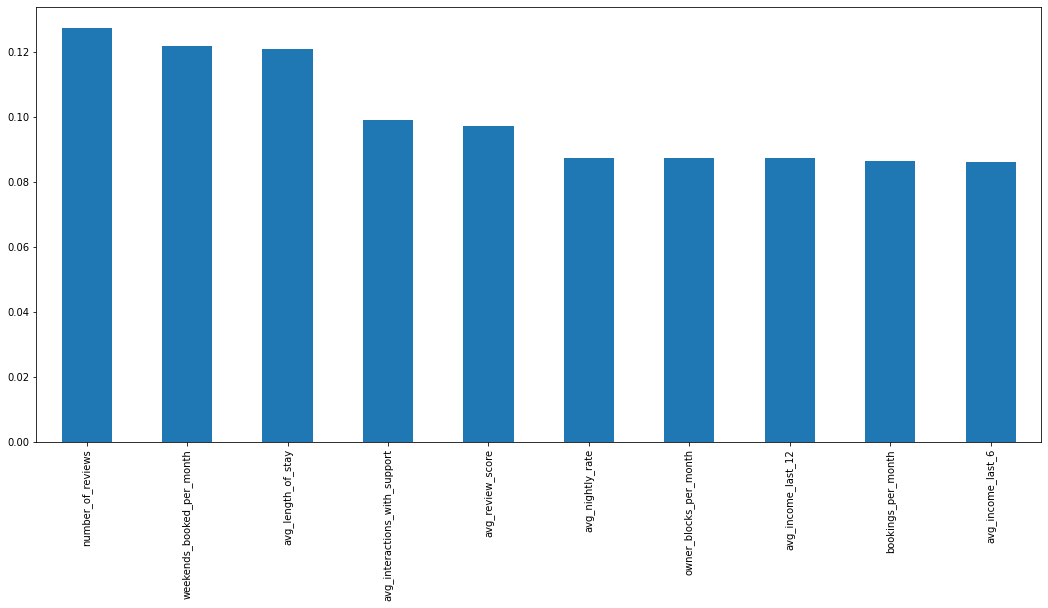

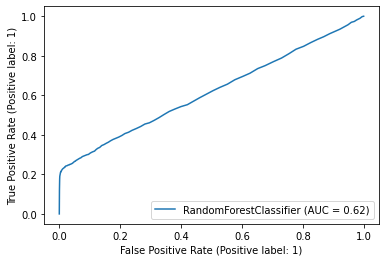

In [38]:
trainMachineLearningALgorithm(X_train, X_test, y_train, y_test, algo="RF")

## Random Forest Classifier - With Over Sampling

Machine Learning Training Started
Doing Over Sampling
Data Size before Over Sampling is 63008
Data Size After Over Sampling is 114296
-------------------------------
Training Data Performance
-------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57148
           1       1.00      1.00      1.00     57148

    accuracy                           1.00    114296
   macro avg       1.00      1.00      1.00    114296
weighted avg       1.00      1.00      1.00    114296


Confusion Matrix
[[57148     0]
 [    0 57148]]
-------------------------------


-------------------------------
Testing Data Performance
-------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.83      0.88     24492
           1       0.18      0.36      0.24      2512

    accuracy                           0.79     27004
   macro avg   

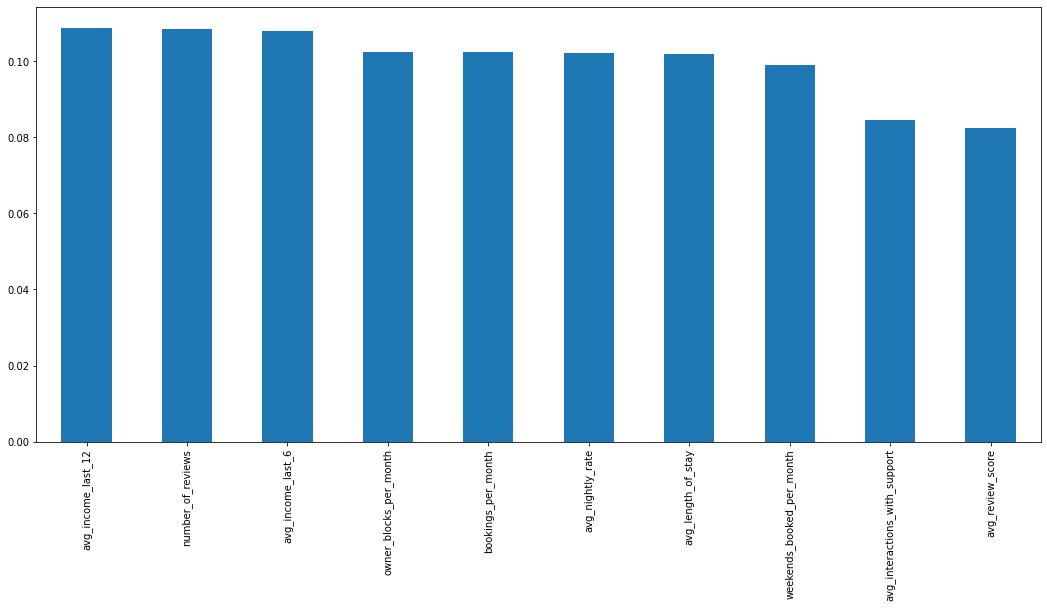

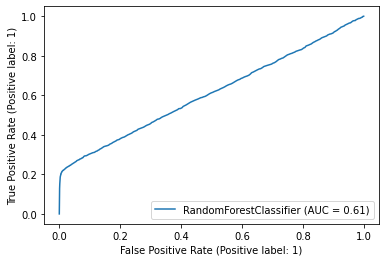

In [39]:
trainMachineLearningALgorithm(X_train, X_test, y_train, y_test, algo="RF", over_sampling=True)

## K-Nearest Neighbhor Algorithm - Without Over Sampling

Machine Learning Training Started
-------------------------------
Training Data Performance
-------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     57148
           1       0.66      0.05      0.10      5860

    accuracy                           0.91     63008
   macro avg       0.79      0.52      0.52     63008
weighted avg       0.89      0.91      0.87     63008


Confusion Matrix
[[56995   153]
 [ 5559   301]]
-------------------------------


-------------------------------
Testing Data Performance
-------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     24492
           1       0.09      0.01      0.01      2512

    accuracy                           0.90     27004
   macro avg       0.50      0.50      0.48     27004
weighted avg       0.83      0.90      0.86     27004


Confu

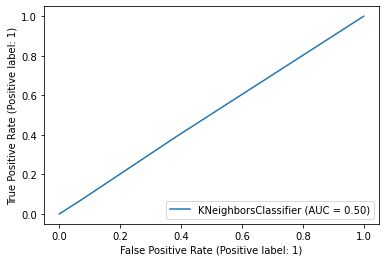

In [40]:
trainMachineLearningALgorithm(X_train, X_test, y_train, y_test, algo="KNN")

## K-Nearest Neighbhor Algorithm - With Over Sampling

Machine Learning Training Started
Doing Over Sampling
Data Size before Over Sampling is 63008
Data Size After Over Sampling is 114296
-------------------------------
Training Data Performance
-------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.77      0.85     57148
           1       0.81      0.97      0.88     57148

    accuracy                           0.87    114296
   macro avg       0.88      0.87      0.87    114296
weighted avg       0.88      0.87      0.87    114296


Confusion Matrix
[[44021 13127]
 [ 1951 55197]]
-------------------------------


-------------------------------
Testing Data Performance
-------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.68      0.78     24492
           1       0.09      0.33      0.15      2512

    accuracy                           0.65     27004
   macro avg   

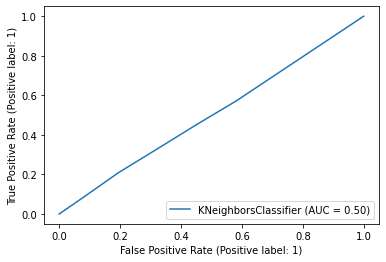

In [41]:
trainMachineLearningALgorithm(X_train, X_test, y_train, y_test, algo="KNN", over_sampling=True)

## Linear Regression - Without Over Sampling

Machine Learning Training Started
-------------------------------
Training Data Performance
-------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     57148
           1       0.96      0.02      0.03      5860

    accuracy                           0.91     63008
   macro avg       0.93      0.51      0.49     63008
weighted avg       0.91      0.91      0.87     63008


Confusion Matrix
[[57144     4]
 [ 5767    93]]
-------------------------------


-------------------------------
Testing Data Performance
-------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     24492
           1       0.95      0.02      0.03      2512

    accuracy                           0.91     27004
   macro avg       0.93      0.51      0.49     27004
weighted avg       0.91      0.91      0.87     27004


Confu

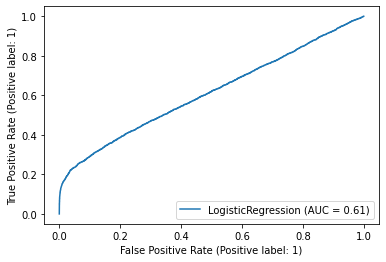

In [42]:
trainMachineLearningALgorithm(X_train, X_test, y_train, y_test, algo="LR")

## Linear Regression - With Over Sampling

Machine Learning Training Started
Doing Over Sampling
Data Size before Over Sampling is 63008
Data Size After Over Sampling is 114296
-------------------------------
Training Data Performance
-------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.60      0.68      0.64     57148
           1       0.63      0.54      0.58     57148

    accuracy                           0.61    114296
   macro avg       0.61      0.61      0.61    114296
weighted avg       0.61      0.61      0.61    114296


Confusion Matrix
[[38942 18206]
 [26222 30926]]
-------------------------------


-------------------------------
Testing Data Performance
-------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.68      0.79     24492
           1       0.13      0.47      0.21      2512

    accuracy                           0.66     27004
   macro avg   

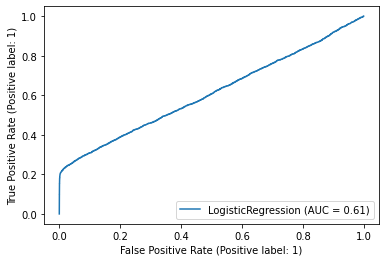

In [43]:
trainMachineLearningALgorithm(X_train, X_test, y_train, y_test, algo="LR", over_sampling=True)

## Conclusion

By checking all above performance parameters (precision, recall, f1 meaure, accuracy and ROC), we can evalate the algorithm and can choose best algorithm among these.


- **Random Forest (without Over Sampling)**
    - Training
        - Precision = 100%
        - Recall = 100%
        - F1 Measure = 100%
        - Accuracy = 100%
    - Testing
        - Precision = 90%
        - Recall = 60%
        - F1 Measure = 65%
        - Accuracy = 92%
        
- **Random Forest (with Over Sampling)**
    - Training
        - Precision = 100%
        - Recall = 100%
        - F1 Measure = 100%
        - Accuracy = 100%
    - Testing
        - Precision = 55%
        - Recall = 59%
        - F1 Measure = 56%
        - Accuracy = 79%

**Performance on training data is 100% (which is dangerous sometimes, because model seems to be overfit, but then we check for testing data). Over Sampling decrease the performance in this case.**


- **KNN (without Over Sampling)**
    - Training
        - Precision = 79%
        - Recall = 52%
        - F1 Measure = 52%
        - Accuracy = 91%
    - Testing
        - Precision = 50%
        - Recall = 50%
        - F1 Measure = 48%
        - Accuracy = 90%
        
- **KNN (with Over Sampling)**
    - Training
        - Precision = 88%
        - Recall = 87%
        - F1 Measure = 87%
        - Accuracy = 87%
    - Testing
        - Precision = 50%
        - Recall = 50%
        - F1 Measure = 46%
        - Accuracy = 65%


**Overall KNN is weaker than Random Forest**.


- **Linear Regression (without Over Sampling)**
    - Training
        - Precision = 93%
        - Recall = 51%
        - F1 Measure = 49%
        - Accuracy = 91%
    - Testing
        - Precision = 93
        - Recall = 51%
        - F1 Measure = 49%
        - Accuracy = 91%
        
- **Linear Regression (with Over Sampling)**
    - Training
        - Precision = 61
        - Recall = 61
        - F1 Measure = 61
        - Accuracy = 61
    - Testing
        - Precision = 53%
        - Recall = 58%
        - F1 Measure = 50%
        - Accuracy = 66

##### Overall Random Forest Performed best for prediction of whether employee will churn or not?
##### Over Sampling over reduce the performance in this specific problem, which nomally increase the performance especaiily when data is class imbalance.

## Solve problem using concept of Isolation Forest

- We will treat the companies who churned as anomalies i.e. very small quantity
- Apply Ensemble Isolation Forest

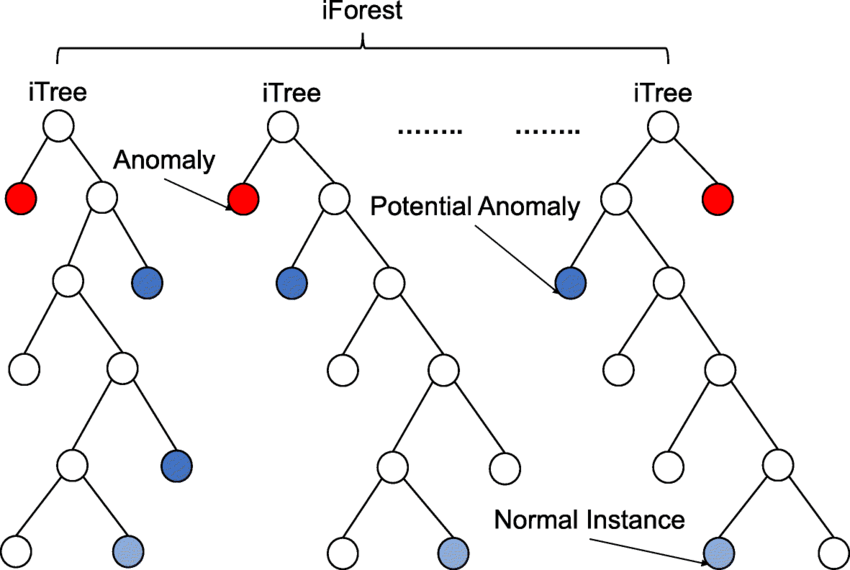

In [51]:
res = pd.DataFrame()
res["Actual_Churn_Status"] = listing_churn_data['churn']

In [52]:
from sklearn.ensemble import IsolationForest

print("Isolation Forest Started")
clf = IsolationForest(n_estimators=1000, random_state=0, n_jobs=3).fit(listing_churn_data.drop(columns=['churn']))

res["Predicted_Churn_Status"] = clf.predict(listing_churn_data.drop(columns=['churn']))

res.loc[res['Actual_Churn_Status'] == True, 'Actual_Churn_Status'] = "Company WIll Churn"
res.loc[res['Actual_Churn_Status'] == False, 'Actual_Churn_Status'] = "Company WIll Not Churn"

res.loc[res['Predicted_Churn_Status'] == -1, 'Predicted_Churn_Status'] = "Company WIll Churn"
res.loc[res['Predicted_Churn_Status'] == 1, 'Predicted_Churn_Status'] = "Company WIll Not Churn"

Isolation Forest Started


In [53]:
res["Predicted_Churn_Status"].value_counts()

Company WIll Not Churn    111169
Company WIll Churn         13831
Name: Predicted_Churn_Status, dtype: int64

In [54]:
res

,Actual_Churn_Status,Predicted_Churn_Status
0,Company WIll Not Churn,Company WIll Not Churn
1,Company WIll Not Churn,Company WIll Not Churn
2,Company WIll Not Churn,Company WIll Not Churn
3,Company WIll Not Churn,Company WIll Not Churn
4,Company WIll Not Churn,Company WIll Not Churn
...,...,...
124995,Company WIll Not Churn,Company WIll Not Churn
124996,Company WIll Not Churn,Company WIll Not Churn
124997,Company WIll Not Churn,Company WIll Not Churn
124998,Company WIll Not Churn,Company WIll Not Churn


In [55]:
print("Classification Report")
confusion_report = classification_report(res["Predicted_Churn_Status"].values, res["Actual_Churn_Status"].values)
print(confusion_report)
    
print("\nConfusion Matrix")
confusion_attack = confusion_matrix(res["Predicted_Churn_Status"], res["Actual_Churn_Status"])
print(confusion_attack)

Classification Report
                        precision    recall  f1-score   support

    Company WIll Churn       0.27      0.17      0.21     13831
Company WIll Not Churn       0.90      0.95      0.92    111169

              accuracy                           0.86    125000
             macro avg       0.59      0.56      0.56    125000
          weighted avg       0.83      0.86      0.84    125000


Confusion Matrix
[[  2293  11538]
 [  6079 105090]]


## Conclusion About Isolation Forest

The model is still able to classify the employees whether they will churn or not up to `86%` accuracy, but other parameters are not so good.

## Solve Using Clustering

- I have used k-Means clustering technique to make clusters of data

In [64]:
kmeans = pd.DataFrame()
kmeans["Actual_Churn_Status"] = listing_churn_data['churn']

In [66]:
from sklearn.cluster import KMeans

kmeans_algo = KMeans(n_clusters = 2, init = "k-means++")
kmeans["KMeans_Label"] = kmeans_algo.fit_predict(listing_churn_data.drop(columns=['churn']))

In [67]:
kmeans["KMeans_Label"].value_counts()

0    63041
1    61959
Name: KMeans_Label, dtype: int64

In [68]:
print("Classification Report")
confusion_report = classification_report(kmeans["KMeans_Label"].values, kmeans["Actual_Churn_Status"].values)
print(confusion_report)
    
print("\nConfusion Matrix")
confusion_attack = confusion_matrix(kmeans["KMeans_Label"], kmeans["Actual_Churn_Status"])
print(confusion_attack)

Classification Report
              precision    recall  f1-score   support

           0       0.50      0.93      0.66     63041
           1       0.50      0.07      0.12     61959

    accuracy                           0.50    125000
   macro avg       0.50      0.50      0.39    125000
weighted avg       0.50      0.50      0.39    125000


Confusion Matrix
[[58849  4192]
 [57779  4180]]


## Conclusion About KMeans Clustering

Unsupervised model is very weak in this, hence not recommended.

## Final Comments

- I have concluded that an efficient model can be developed, if we revise our feature evaluation methods.
- The classification models (supervised) are recommended here, because have achieve high performance.
- We can try some deep learning based models.


## How It will Work?

This model will be deployed as service, which can be used by Customer Success Team, they will have dashboard of all companies, their current status and based on current status what is the probability that they will churn in near future. (although to predict churn in some time frame let say in next 30 days, we need quality data which contain all these details.). The companies which have high probability of churn, will be contacted by Customer Success Team about the service. Apart from scores, we will also show the main reasons of churn.

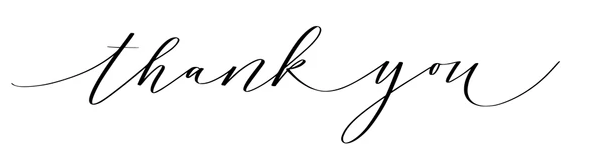

In [111]:
import pandas as pd
import math
import sklearn

def distance(data_loan, data_derogatory, test_loan, test_derogatory):
    print(data_loan, data_derogatory, test_loan, test_derogatory)
    return math.sqrt((data_derogatory[0] - test_loan) ** 2 +
                     100000000 * (data_derogatory[1] - test_derogatory) ** 2)

def application_approval(data, loan, derogatory_marks, k):
    """
    :param data: (pandas.DataFrame) A DataFrame that contains training data. 
                    It has the following columns: Loan, DerogatoryMarks, Accepted.
    :param loan: (int) Requested loan.
    :param derogatory_marks: (int) Number of derogatory marks for the customer.
    :param k: (int) Coeficient k in the k-nearest neighbors' algorithm.
    :returns: (boolean) True if the customer's loan can be accepted; False otherwise.
    """
    
    X = data[['Loan', 'DerogatoryMarks']].values
    y = data['Accepted'].values
    
    knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k, algorithm='brute', metric=distance, metric_params={'test_loan':loan, 'test_derogatory':derogatory_marks})
    knn.fit(X, y)
    
    predict = knn.predict([[loan, derogatory_marks]])
    
    return predict[0]

data = pd.DataFrame({
            'Loan' : [52000, 100000, 97000, 62000],
            'DerogatoryMarks' : [0, 2, 0, 5],
            'Accepted' : [True, True, False, True]
        }, 
        columns = ['Loan', 'DerogatoryMarks', 'Accepted']
    )
print(application_approval(data, 85000, 1, 3))

[8.5e+04 1.0e+00] [52000.     0.] 85000 1
[8.5e+04 1.0e+00] [1.e+05 2.e+00] 85000 1
[8.5e+04 1.0e+00] [97000.     0.] 85000 1
[8.5e+04 1.0e+00] [6.2e+04 5.0e+00] 85000 1
True
